# Testing model using interpreter

In [1]:
# import library

import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import json, requests

In [2]:
class_name = ['chickenpox', 'normal', 'scabies']

# Use this code when the test use keras model

In [4]:
# download file model from file
# https://drive.google.com/file/d/1Wv3UxG5RAP6n-XWHOeAlynb9Xoe_5B63/view?usp=sharing
!gdown --id 1Wv3UxG5RAP6n-XWHOeAlynb9Xoe_5B63

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Wv3UxG5RAP6n-XWHOeAlynb9Xoe_5B63
To: /content/model.h5
100% 9.32M/9.32M [00:00<00:00, 167MB/s]


In [5]:
# load the model
skin_disease = 'model.h5'

model = keras.models.load_model(skin_disease, custom_objects={'KerasLayer':hub.KerasLayer})
model.get_config()


{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'name': 'keras_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'KerasLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'handle': 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4',
    'name': 'keras_layer',
    'trainable': False}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regula

Saving 24.JPG to 24.JPG


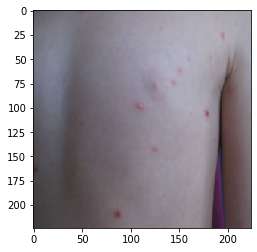


Predicting: 95.41% of chickenpox
tf.Tensor([9.5412445e-01 2.2617498e-04 4.5649320e-02], shape=(3,), dtype=float32)


In [6]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))
  plt.imshow(img)
  plt.show()

  img = tf.keras.utils.img_to_array(img)
  img = img.astype(np.float32) / 255
  img = np.expand_dims(img, axis=0)
  images = np.vstack([img])

  output_data = model(images)
  pred = np.argmax(output_data, axis=1)

  data = {'persentase' : np.max(output_data)*100, 'pred' : class_name[pred[0]]}
  with open ('file.json', 'w') as f:
    json.dump(data, f, indent=4)

  print(f"\nPredicting: {(np.max(output_data))*100:.2f}% of {class_name[pred[0]]}")
  print(output_data[0])


# Use this code when the test use tflite model

In [ ]:
interpreter = tf.lite.Interpreter(model_path="2skin_model.tflite")
interpreter.allocate_tensors()

In [ ]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

[{'name': 'serving_default_keras_layer_input:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 177, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


Saving 24.JPG to 24.JPG


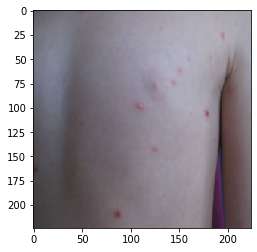


Predicting: 80.72% of chickenpox
[[0.8071685  0.19283153]]


In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(224, 224))
  plt.imshow(img)
  plt.show()

  img = tf.keras.utils.img_to_array(img)
  img = img.astype(np.float32) / 255
  img = np.expand_dims(img, axis=0)
  images = np.vstack([img])

  input_shape = input_details[0]['shape']
  interpreter.set_tensor(input_details[0]['index'], images)

  interpreter.invoke()

  output_data = interpreter.get_tensor(output_details[0]['index'])
  pred = np.argmax(output_data, axis=1)

  data = {'persentase' : np.max(output_data)*100, 'pred' : class_name[pred[0]]}
  with open ('file.json', 'w') as f:
    json.dump(data, f, indent=4)

  print(f"\nPredicting: {(np.max(output_data))*100:.2f}% of {class_name[pred[0]]}")
  print(output_data)
